[0]	train-rmse:1.08445	eval-rmse:1.07645
[10]	train-rmse:0.70240	eval-rmse:0.72915
[20]	train-rmse:0.58832	eval-rmse:0.63672
[30]	train-rmse:0.52661	eval-rmse:0.58644
[40]	train-rmse:0.49829	eval-rmse:0.56692
[50]	train-rmse:0.48013	eval-rmse:0.55584
[60]	train-rmse:0.46794	eval-rmse:0.54984
[70]	train-rmse:0.44991	eval-rmse:0.54022
[80]	train-rmse:0.43766	eval-rmse:0.53490
[90]	train-rmse:0.42495	eval-rmse:0.52841
[99]	train-rmse:0.41470	eval-rmse:0.52447
RMSE: 0.5245
R^2 Score: 0.7901


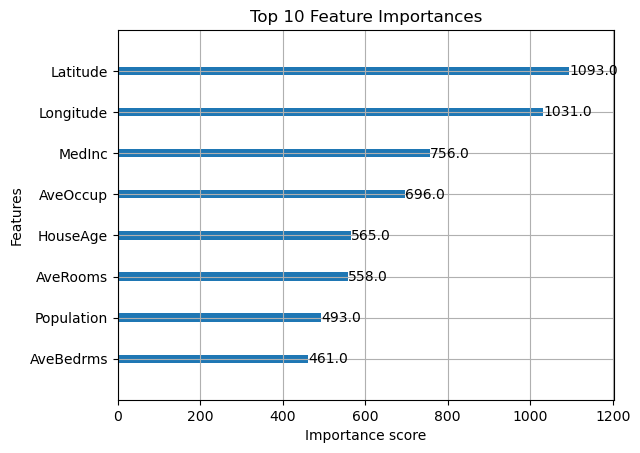

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt

#=====================  Load California housing dataset ==================
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# ============ Introduce missing values randomly (optional step to simulate real data) =====================
rng = np.random.default_rng(42)
mask = rng.random(X.shape) < 0.05
X = X.mask(mask)

# ==================  Fill missing values with median ===========
X = X.fillna(X.median())

# ================ Train-test split ==========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================  Convert to DMatrix ===============
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# ================= XGBoost regression parameters =====================
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 6,
    'seed': 42
}

# ===============  Train the model ====================
evals = [(dtrain, 'train'), (dtest, 'eval')]
model = xgb.train(
    params,
    dtrain,
    num_boost_round=100,
    evals=evals,
    early_stopping_rounds=10,
    verbose_eval=10
)


y_pred = model.predict(dtest)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")
xgb.plot_importance(model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()
